In [164]:
from flask import Flask
from flask import request
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import dash_table
import pandas as pd
import numpy as np
import json
import re



In [ ]:
# server = Flask(__name__)
# app = dash.Dash(
#     __name__,
#     server = server,
#     serve_locally = False,
#     requests_pathname_prefix = "/plotary/dash/",
# )

app = dash.Dash(__name__,url_base_pathname="/plotary/dash/")

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
        html.Div([
#         html.A([
#             html.Div(['goto man-es page'],id="logo")
#         ],href='https://man-es.com'),
        html.Div([
            html.H1('Keine Auswertung ausgewählt. ')
        ],id="description"),
        # This Link does not seem to be causing an invocation of the callback 
        dcc.Link('Navigate to https://man-es.com', href='https://man-es.com'),
        html.Br(),
        # These 2 Links DO seem to be causing an invocation of the callback 
        dcc.Link('Navigate to "/plotary/dash/"', href='/plotary/dash/'),
        html.Br(),
        dcc.Link('Navigate to "/plotary/"', href='/plotary/'),
            
    ],
    id="navbar")]
)

@app.callback(Output('description', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    print(f'entering callback for pathname {pathname}')
    return html.Div([
        html.H1('Auswertung Nr {}'.format(pathname))
    ])

# if __name__ == '__main__':
#     app.run_server(port=8882,debug=False)

In [ ]:
import numpy as np
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

import dash_table

def make_dt(table_id,df,display_headers=True):
    dt = dash_table.DataTable(
        id=table_id,
        columns=[{"name": i, "id": i} for i in df.columns],
        data=df.to_dict('records'),
        filter_action="custom",
        sort_action="native",
        sort_mode="multi",
        column_selectable="single",
        row_selectable="multi",
#         style_cell={
#             'width': '{}%'.format(len(df.columns)),
#             'textOverflow': 'ellipsis',
#             'overflow': 'hidden'
#         }
    )
    if not display_headers:
        dt.style_header = {'display': 'none'}        
    return dt

    
def make_text_centered_div(text):    
    col_inner_style = {
        'margin':'auto',
        'word-break':'break-all',
        'word-wrap': 'break-word',
        'text-align':'center'
    }
    return html.Div([text],style=col_inner_style)

# make simple DataFrame
x = np.arange(0,20)
y = x**2
df = pd.DataFrame({'x':x,'y':y})

# create an "aggregates" DataFrame
df_agg = pd.DataFrame({'x':[int(df.x.mean())],'y':[df.y.sum()]})

# create dash_tables
dt = make_dt('mydt',df)
dt_agg = make_dt('mydt_agg',df_agg,display_headers=False)
agg_title = make_text_centered_div("aggregates")

# make app
app = dash.Dash(__name__)
app.layout = html.Div([dt,agg_title,dt_agg])
app.title = "My DataFrame With Aggs"

@app.callback(
    Output('mydt_agg','data'),
    [Input('mydt', 'rows'),
     Input('mydt', 'selected_row_indices')])
def selected_callback(rows,selected_row_indices):
    try:
        df_selected_rows=pd.DataFrame(rows)
        df_new_agg = pd.DataFrame({'x':[df_selected_rows.x.mean()],'y':[df_selected_rows.y.sum()]})
        d = df_new_agg.to_dict('records')
        return d
    except Exception as e:
        print(str(e))
        print(rows,selected_row_indices)
        raise PreventUpdate()

@app.callback(
    Output('mydt','data'),
#     [Input('mydt','filter_query')]
    [Input('mydt','derived_filter_query_structure')]
)
def process_filter(filter_query):
    print(filter_query,type(filter_query))
    return df.to_dict('records')
    if filter_query is None or len(filter_query)<=0:
        return df.to_dict('records')
    df_temp = df.copy()
    #{x} > 10 && {y} > 50
    fq = str(filter_query).replace('"','').replace('{',"").replace('}',"").replace('&&','and')
    print(fq)
    df_temp = df_temp.query(fq)
    return df_temp.to_dict('records')


app.run_server(host='127.0.0.1',port=8884)


In [ ]:
import io
import pathlib
h = pathlib.Path.home()
nym = open(f'{h}/downloads/nymex.settle.20200619.s.csv','r').readlines()
sio = io.StringIO()
sio.writelines(nym)
sio.seek(0)
df = pd.read_csv(sio)


In [ ]:
len(df),len(nym)

In [ ]:
import zipfile
z= f'{h}/downloads/nymex.settle.20200619.s.csv.zip'
f = zipfile.ZipFile(z).open('nymex.settle.20200619.s.csv')
nym2 = [l.decode("utf-8")  for l in f]
sio2 = io.StringIO()
sio2.writelines(nym2)
sio2.seek(0)
df2 = pd.read_csv(sio2)


In [ ]:
df2

In [ ]:
import zipfile
# z= f'{h}/downloads/nymex.settle.20200619.s.csv.zip'
z= f'{h}/downloads/df_avg_implied.csv.zip'
zo = open(z,'rb').read()
zoio = io.BytesIO()
zoio.write(zo)
# f = zipfile.ZipFile(zoio).open('nymex.settle.20200619.s.csv')
f = zipfile.ZipFile(zoio).open('df_avg_implied.csv')
nym2 = [l.decode("utf-8")  for l in f]
sio2 = io.StringIO()
sio2.writelines(nym2)
sio2.seek(0)
df2 = pd.read_csv(sio2)


In [ ]:
zo

In [ ]:
zoio.read()

In [ ]:
df2

In [ ]:
import re
re.findall("\.zip$",'df_avg_implied.csv.zip'.lower())

In [ ]:
import base64
c = "UEsDBBQACAAIAOl49lAAAAAAAAAAAAAAAAASABAAZGZfYXZnX2ltcGxpZWQuY3N2VVgMAGaOGF9mjhhf9QEUAG2aSa/jupKE9/wtFw8iKVHSUp6OXR7L1vHxqU2jV73ph7do4AH97/uLTMoF9K3CHVBhmyJziIxM6n/+959//ee//+s//v2v/w7TdPor/qNph9y2pUlN1/RDbMNlfdr/1fxjLG3uuiF1cexyTF24r0+Cc2qavovdUMbYNn3YbYXGcUxd7mMz5r4L020S2LRp7Ad+wO/bcQxrW2EYWbfrl3VjWF/nb+F91zR60OdkXytjKm3TpDJ0XVv6cHw8BDdjM+Sx1dqFn4SPm+B+BOtzn5vW0NNK4MB3YuzafmDDJYf5dhdc+mZMsU+G8sDz/WpwWzDBGBtHN6+10E5G4eta9fxxNoitd6Xp/FGfOmvf5lhKyc3QyQIR1OBUmr6M3dDItqmE3XwwuOmbboy9H2HzvAjkqHnk1HlIg+zw9X0RXsae4zY55XYoOY1hOh0FD33fsn6OQ+aZY9iY2cqQY8P39NSsJ96e8mbBDy3rZMzBQl1YaXulsIHYsOGxLzLQbrp8GI4NCIChzXJKCpvDw1bpGmwxYlYzUhvOe9tKm7ohltGt1MRwuT4Nbkpye4TnYZI1MVBm1yPHGfmwhO3rpvgpBEpp+eOWSuFxs30QAbj/t0+2886WiZnQi0NJ/cgvw+nbnhdj27XN0HAkfB7D42SLNF1HbLC8xcwY9l9nh2W+Gty76wvM9qpdc2j+xDCdN4KHthuHYWhKNd5+dTBYoRW77BFewvn6MLjp+qY0TWdnL2H+mhV2HINvkxBubXZ9WRs8jEPG+ZkMIkjC3vzY9ZG/sBPzDIsTjtp2R4CM5OuQeGQTcdnJHorfS7aU1O5jOH0+De5jmzlKOyiocjg9/dtkYIlNYqkxpbA3qxIAKRMoBLeiNWO/lcFNxtgZm3uQvO5mKxZg+SGlVMw3H1tDu4LH6tnJg6efnVwZa8KbYdfnyWD2gGUbZ46B0P5QyHetUiY34+h2DJevx+Q4th5jTbMS7maqllSIMFhN6bAzEEIYhzchnKe7o6QS2405c1CM/ZgNJoqqG0VC4Xq0w2Ssxicxml1z+NqsHe4baIidjKUZ27DZmVHTiOPbNg/VTvPL1k49iWuQr727VzgWGDONqR2atg/r6W47TCWmHsIiXjFXGz5Psx0deiUheXYiwpsxnG+2l5T5ZsY1sfQK7t365XDbVseYvW/Tt3+dtZuB1YkdzAUfXXw3HA+SLV0kAlI43D5uDpMlAxUi9UTXEE7Hn4KhukZc5QQRHt9mcaXo6MjudLg7lEnfRkGBAduwO8wWUhGqzemd1tPK80xpzfHSkNqekAuH5y+DE/aOVgbkysfh6YuQIW0pfe4oCANk9H2qMGGcnUOPB0ua2MA6TWVhonK/mizOmhFzmIe06/3W/NgMLVZi3axlc7icHv7lIRM6sF/r1WB/t21gCZwz8hOtUsJldfoTvL7u/g7D/XejEswMB/TwX0vJCp973wkWieP76GHefBjMXygJMdvuWcKCFUqNMdUKvH5dHVOUtxEC6wnu8PREJ1XaqERqFGUpPC/+7WaE0hZzREWBw0o7BQCU27dhf9CWVQcoBFn1mMRJrYrE+uifNGloxa7m3fXmy9CeP7CcuQKCDMftt+GlI59KVwt6sXUm+0QchfcrSedw3xmcolOlIufw4ZAKKlvxJKZ2bk8n+0D2GC0wLazC6qjAhA47nNl0C/HcXpu/w30fLnbUAbru86hzyTRhe7WnQkJIiY6ylSnBbThtHeb7xA2JLHt1pPDl/Ed8us1P+yD2ZAhGcRsTQs/N5B/wOBllNLcQAJPSkgLat6QW0sKW6slAM2XPqm0afPMYPBxmg1kCcgJuZTwkiwUduPynCLH44LRfZrSehMLiNdJh5fOvi+PUP1FzSxkbdeC7sQ2e7mBbkauH2eVqHidXCAN+NI4EZlSRnRxPaEsKqgUUfr3UcxV9QqTFJNoeg8kt0IFK1fTGzmG6bGdHOWCDfZoojRb2HjOlQNYDpak3+iPvDheLGpREYSP9wrfTeW2RUGDz1Hl9ZPmf9+fVYYphykgPJVbThut57XhU5rWewENY78znJSFIVN0t5ln+6350PJLwEgoW3Tz2YC4v0LVCzfZOqd2bDCL9qd0QDT5RHW/D/WoFCruqoo6LrAiHy/rb8Ux24xWTXymcX0Z4badnYn6XgZnCunI4oVLf5SXsT746jCAXlqqJISs7VddCnCKLyuoroyV+SNJSLBr9hkS+nK5Hx4k6KsOodFD2rOeT4/FdhmffB0uqoDUiZra9PvvzIhTURVyB6BxTuO8tTtld46JOa8B4X3tzHQEgWmgXHX3aXhzmFPzc6wKwBWOr3IMOKIFYn+bHIo5HwjxowWiHQS4/LKI5L1JZCRtVuSCxq3+fPZNJ5ECtdPcfFl1knToMMSU/CLf92VESshslP5NJgsdlchynoRYQcsoxStrX0XFFCRlPaCSY9u6EgnORsKT8wu6/VndfR8FJ/MKaKIAeZTZZVCgZf0uf/e2ngziSyvNue778u4M1EUs3ksPNIxoKZJkIZbcmcr6sdHB+6Zx+EX2PrcUt/o5aB4ksc4Xb9+3kuH5MwNEANrDvep4sglBECBCsNSxxsd6bfSm55S3PJLkwgTmVAkPThoSPvefv83R1nG9SVqLJJUSXBbSc8G7GwpfnEH/HnZF0Y1vtSIquHMYDEGnpa01ZHS9ugcZoNMEEqstduGzNq2oiqlYMazs+1Y5ggb5pQRAe9CMrhzO1eum52mCaiJggdGpwWjFZudPEexBdTc0UVl+Tw6gW6+pcA9xWaztNIgHtHC5GnpMvzkZZZBEvbfh1uJr9YNwkLlps8phfDsP/eMYrG3S2uvuJ8kBgVYKm4ptBpIXRHbXu0Ei5MxESmPAdVvP8ZZ6J2jP9L64hjtB+Xuw4I+Txu4MPz7tvJfY6PJFhao0qSFLY+qhNmlza1MaUCeVid/JfgEcFClWzSDmsXhZEhDnMnxHjbpuN00hMkuGlaiF2ert/Ok7QYvUhGnGFjVcvipD6avSo+YlOy5waY6FhQT1JqUmHf1YUmUIiWl9LDDkV0YqTilV9xAQNvyquvEJ4uIaWYDan0lFgn1iJlYZjsmdqldi+ZyYUHUfd8k5+s4nU/weu56cFkR6H16yvL1JS0+GX40idwv6ogpB/DsezWZYikwZKB/2dxARS5Tz5BokdBGxUGpHpfGCaGRyj1tw0Fnl4IuLS7GTuG1odrg7DWFBW21vian3zHFKzownpanMRdjsrlya9NKZaJOVq9e0wpTvJyhaqtACP9cE/IJdI4FJT/Xw6O9xpBZYxLu3D8WRjCT7Ians1OVEKhfWlwop4/uvc0IbL59ZxJCIio7EcJsueZ/8+8hiOGTwvE2XAUCKUJGmXPjLMu5fhRZVbDKPlaRFOhuJmnrnMlwoxMDuOUqcdreMDHL5xG4jX2DQrY+kh+IQEOKkUFVMvRNJ1PjwMJ6Jx7FIGwvzD90Ib2SzxhcQjNz6u/kGUsqM3NMETDqfzxXB4iZBfeAmRu7kbzplqX1YFz/x0l6CBxI9j7Y/D9uEbMt1OkenURmDj1/fpj/jnQ7mglOlMmCiSpXEnS3rICoWOjBlorFux9e1yd7yBHdpUBxVE4MHX6SllNFwu3zHE9uQwPEPDyhNMUE2bx9HwQgLqqBpJtUPYPu8fhncieMkwDec47/5xWPsHLNDgcXcB+zydLHg4vqkeRLy7gD7ILEEw0brCzmrN4xA+bmZpMYcTMY0VgR0Om9fLP2CfveYZ1iKhCizc4NfBSoMX1zA9vx3mr3h3gJF5LIXky+zDNpDdy+Qthtfp8nI8UROxTHFluZ5fD8cbTT8XNkIvHM2/FuQcKXmXET5Mdqk4j+pMlw50Ok6WimhQcsV8IL9I18/+AXTEQxUsKlZt2Po6iHeioHJ0G2aPEvQV4Zlqb9rxVEPJrYF1XJCX8MNBxDbKolhzQcRuZvMHmpcSK47NeB3R6sdJmr1RcXzIE7xIIYoII/LeBT06fLczmBiTQ51XxvBzffXDNO0gteA2R1c7iJ5YIowyettOFmJ8D33aR880TYT2DuPd9xwcPbvZ/BH+OltcI3F6Y4LOekCY1U5Je8naqW1dF1JxnLKwEkG31C0IfWMVA7+MGCz3te8iDw5/gh8rJ1DNHrET5cGkWDj51rOUKzVhlPPhQ6fVorHSMC5zmvDDTU7nxva6xQCaFj2e/oHqgYjWOlLY+eawGv6eVtWUR7if3TCNTSZIIQUQzr/Y1J+o4YBLs45pwrSzYKERJbKWEk0AzOfPh39AolOQ62A7bH/6OpA2xtdkv5X7jo9Ph9EDFM5sZQoeuJpIyZpea3ywNFGbjwpr0KZYt+3n8OO4tzxFuRQ6o2H0BOvCdVP3yXfZYF8jOIetMzHErRBo6iOUSc6skIMmHzCx0THU574CVxZl0y82LJptui+xjl+RMsUDc/9pQawpJdRB0e91z4NWt8rQJZtLDGrO2GgJ56PnCOaRemiHbFcqND033w/uTu9ZZU/Xf3ec3XRvotRCj4PjRAhJOCQTLuGw9eVpx7JKyVAkq8Pj++iwmoqxjiAifGtTwqzxlUblHuTh4+urolHalEpirRwN9WxubHW7odlW1IytC8f92uE+a34/GqmOqC03AkyHGfsqrCGryVH8tLTHyJXLwxehNrG1oaq+sLHM1GAyicQ0FaWy7DZ2TE1ISQ/sNYhboVmrN+rs+9+dPYnm3+aRRcMaz0xqhz+RfOriMnQaw2ljVxQK0VzbEovJk03pdQ8YoW9KnV9F3H2DmjWJJPEoEidMLmtoBUdNpUYvxmH98J0QocMoprVhCPF7P337B0VXIDCllTS8vJsdJzOxU6yXOYebo+QdujxbR0l+nLf12wgpWuo6lICv7K4p0wzQ2A12D2iN4PNuglgXRVK39YKFqno/L7gO1NV7T9jW12+SOGsYvAEN96slnwYJzuG6yRyzhpSOk1mQxjJVejnvZ7WqDWey31Bsty75TL0ogokhrBM+fBE8qsrfGx3y0Gm1dhwVYfMKa0TJpPX+yz+ILYdt31Pk9fXqOEXeYtXa4XBxjaJa8Z7KSDLdbV4D3ipfNKRX9Ibt4VXhXAdKVlOnzWrrOFxDVySBIY6/20hEMMd8X+pBD3VxojH1Q61E4TxvKkwBovnvk8nhsN5c3AhdI+PU+TrduaWjSKrvlnlYWHmM8TQ11GNfq9B5evwJ/rheXQ9gJA7TqDaOajD4geUpDy2k9cKFJMLtl+FKF0l+Ky4p/Li5V23+gDVLsthY3w1Og91VaaSrGhJO1j8iBumq6eabaFOR8HWaK45Ddbvn/Yzt0nHikPwlyWhq6MQNRAi1JvR8sLK1K3Tgxv5x0tTdx8VmHJkgH37vEMs8HNVA++1Tujwj2CSSqi2eRdHt7oskm4otFyNhO1vGJOn6uNxIdtRDjxdwdIhCQHmZggvpREnthlpj+F+YnHr+hh+qFQldTJ79doVgn6abL0Q3SyJBWEiIRI96uvguGzGM7spsGBPO17+jMOG0sSjF8VKry3Afwn94ckBWGmhI1A5RKbw93x1HWrLVxqZprPP0hojGF6qGO7xF64OjvarVMsGHaJ3ziPVOs2+8oisLMnj1aTbDE81bivYtseQu0XsVaOMOZ9Hxs835Y3YcdaQrOGvwqf0v32SnUF/uk0imp6+OKB6S7oRd6XwcTpZ8UWM+Yn5w6ifGrpbZCNpO8t01DbG3vV8cp3RKHDupoiVtMxrEsQBF3MQULvxpHNxomC8RaSHe6NLVYKpm8248kCHGD8qJvuuWEd3Kv0pJJ4uwevS59erucJKLiw8jkWJrV4watw7d+z5YLZbDVO9OQt2aUCSCK33OgRtIVrvh7lXzjWcJXYpPquM7dvPtwkcz2HrrLdYnZjyDKeyqvwSy5q+DvcWw8Q8gn9TUcW8Kl6uvnzLCpJDuUe/UhFXdpqbakI930IVT2eV8RqhnsWy9hKLe+uKSMJrikMbUW43wfjlOGYPeawenwucGVtvVqYeDJRDc4WbXeeBw2/B71j/fja+SmktYvF7opfBpKjtJCrkWspnZr/nhaAcvv+/mws3u55NGJRrIdnphZSSo1xXHP5Lli1Sf70+De3k6665f3XnY+trQAovQsdjkLfxY7ec/4buDf70Mw/KKkfXHp8Ol4nZDr7mUhgXBd4K44d+yiPrH3g/fqYhJ65ssQsyYvku6StBdaL1/4kRbhzXWjrn6qISN3UgQEFklb+ExWGO18pM2klUl1Zs5SS77AaE+DBqpRt2806o+bh+HP36wOn87rvbrnTktfcbF8aRXCnJjLoElJxNv1KbS6q2OzmiPA9sVMnC2qXwzmhiHIjYOq8zmOlDVzPO+NpwyU+Amn8ChZ6ZfZh66tU7dR70oCPPLNwOCxlGeSLp+mv5PigoIopTlGmP78sU7fcTzfEqo+9K94xqmK/p0QUV67O/mKytCwPWOTyMXN40mIuUti8J82BnMouX9EhihunUL6Ipa9bkOFI7uD83ax2hjfBsRWw1CmTYd2VFHV4SH9XaqMo00AphELZ2jWUVEsrxioRibNmeH8VdbX++CocNq46t0HK/t6uU/iTr9sB3qLq2VFnJBE272qh1wp6aA/0XT9OfN7LBWjjjIWA9JcPan6uKFUMFg4l+sZZ5WYerVdqHVjavXC06HXAu8r6sbYqJtaRf5ojULIkxq8vucSOWHb1v6o6vvFojDT2dfSFMACsxgerxwHitKSYMDGoNSrz278HQUHUOgRH9tSy+wvBzX2KCtl2FtuF0sJoq9naWbWRsEhctm+um4pB/OLOZRaRnbPMGvwcly2xIeni1F16nZLSXSD7cP/3qnm3VdINgtWZi2/vVWg39W8eugcKmw5tV6t86cMYTLscJiHhq7tg6apg+HdT0K/djNLjrRzVU0k6Cu51In7WvTchpLURsRso1u7EjRyQlAV97q4NvWbiGIrskN1ugqB7K32xOWuUlY6p4o/74nyixztos2VIrG3ZKMlZSn1ex4ryv7vr62g6C3G25UhgayhF523T7N1woTvJLcpb4zZ+9qSZRo3FpfVAu3td1bJSU4MMFmoyJK886XgZOX10r1GlswJQ7VkQAkY/KmQyXVN5PUHtolpV1nGajSrUGET4050FeFSThdw/qbrKgYu8yjmcvJ3m9YrjKu/uYrWYT6GJr33G43meaWFhr0o3q9Qqu6tsAmGjUCzvVVrhQeP2zz2cZciSDws543p1+GD4MW9gEznjofjR7xnd6AGuutq95tcVy1He2QfdbeoerNs1nzNipkA71bPr1MkMsgSRWo1kM8vr44HvVmFCpNs5OwcQxDsUvjBr0fs3VYIdTryTb70sxRMLHq9dC9SjaZ73DqWKPX3g/0co2D9Jpc5+87SoWtbBECOqsxQlhotkqg2q6j3nRpuuWGEnLcmiyJ6pL69/sZtHQ2zwTXm8yli8tY9Gh7wU58dViGXm3YfFoQ6L0ComV5WxPykStgRaIjv9/VgfD9PQxOqKYcLWs1aaCY3AxWqEiJ9T4VDD8umjkrupRf1GAzZDAFZu9r8ARiyV9dub5Uv3S+9wXX/wFQSwcI8AwO7zAWAACoLQAAUEsDBAoAAAAAAHJ8+1AAAAAAAAAAAAAAAAAJABAAX19NQUNPU1gvVVgMAIcsH1+HLB9f9QEUAFBLAwQUAAgACADpePZQAAAAAAAAAAAAAAAAHQAQAF9fTUFDT1NYLy5fZGZfYXZnX2ltcGxpZWQuY3N2VVgMAGaOGF9mjhhf9QEUAGNgFWNnYGJg8E1MVvAPVohQgAKQGAMnEBsBcRcQg/h7GIgCjiEhQVAmSMcMIFZBU8KIEBdNzs/VSywoyEnVKyxNLErMK8nMS2Uo1DcwsDCyNk0ztLBINTe39s1MLsovzk8riakwMnCtSE7NsWYAAFBLBwhdNRAjbwAAALwAAABQSwECFQMUAAgACADpePZQ8AwO7zAWAACoLQAAEgAMAAAAAAAAAABApIEAAAAAZGZfYXZnX2ltcGxpZWQuY3N2VVgIAGaOGF9mjhhfUEsBAhUDCgAAAAAAcnz7UAAAAAAAAAAAAAAAAAkADAAAAAAAAAAAQP1BgBYAAF9fTUFDT1NYL1VYCACHLB9fhywfX1BLAQIVAxQACAAIAOl49lBdNRAjbwAAALwAAAAdAAwAAAAAAAAAAECkgbcWAABfX01BQ09TWC8uX2RmX2F2Z19pbXBsaWVkLmNzdlVYCABmjhhfZo4YX1BLBQYAAAAAAwADAOYAAACBFwAAAAA="
content_decoded = base64.b64decode(c)
# Use BytesIO to handle the decoded content
zoio2 = io.BytesIO(content_decoded)
f = zipfile.ZipFile(zoio2).open('df_avg_implied.csv')
nym2 = [l.decode("utf-8")  for l in f]
sio2 = io.StringIO()
sio2.writelines(nym2)
sio2.seek(0)
df = pd.read_csv(sio2)



In [ ]:
df

In [ ]:
app = dash.Dash()
inp = dcc.Input(id='myinput',)
app.layout = html.Div([inp,html.Div(id='c1'),html.Div(id='c2')])

@app.callback(
    [Output('c1', 'children'),
     Output('c2', 'children')],
    [Input('myinput', 'value')])
def update_graph(v):
    return v,v.upper()
app.run_server(host='127.0.0.1',port=8844)

In [ ]:
from dashapp import dashapp2 as dashapp
import importlib
importlib.reload(dashapp)
inp = dcc.Input(id='myinput')
dap = dashapp.DashApp()
layout = html.Div([inp,html.Div(id='c1'),html.Div(id='c2')])
def _dd(input_data):
    return [input_data[0][::-1],input_data[0].upper()]
d = dashapp.DashLink([(inp,'value')],[('c1','children'),('c2','children')],_dd)
dap.add_links([d])
dap.create_app(layout,app_port=8844)


In [ ]:
?dashapp.make_dashtable

In [ ]:
from dashapp import dashapp2 as dashapp
import importlib
importlib.reload(dashapp)
inp = dcc.Input(id='myinput')
s = dcc.Store(id='mystore')
d1 = dashapp.DashLink(
    [(inp,'value')],
    [(s,'data')],
    lambda i:[pd.DataFrame({'d':[i[0],i[0][::-1]]})])

t,tlink = dashapp.make_dashtable('dtable',df_in=pd.DataFrame(),
                input_store=s,update_columns=True)


dap = dashapp.DashApp()
layout = html.Div([inp,html.Div(id='c1'),html.Div(id='c2'),t,s])

d2 = dashapp.DashLink([(s,'data')],[('c1','children')],
                     lambda i:[i[0]['d']])
d3 = dashapp.DashLink([(s,'data')],[('c2','children')],
                     lambda i:[i[-1]['d'][::-1]],
                     )
dap.add_links([d1,d2,d3,tlink])
dap.create_app(layout,app_port=8844)


In [ ]:
# use an dcc.Upload to get new zip file
import base64
import io
import zipfile
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

import dash_table
import pandas as pd
import numpy as np



def zipdata_to_df(contents,filename=None):
    content_decoded = base64.b64decode(contents)
    # Use BytesIO to handle the decoded content
    zoio2 = io.BytesIO(content_decoded)
    return zipfile_to_df(zoio2,filename)

def zipfile_to_df(z,filename=None):
    z = zipfile.ZipFile(z)
    fn = filename
    if fn is None:
        fn = z.namelist()[0]
    f = z.open(fn.replace('.zip',''))
    nym2 = [l.decode("utf-8")  for l in f]
    sio2 = io.StringIO()
    sio2.writelines(nym2)
    sio2.seek(0)
    df = pd.read_csv(sio2)
    return df

def df_to_zipdata(df,filename):
    sio2 = io.StringIO()
    df.to_csv(sio2,index=False)
    sio2.seek(0)
    zoio2 = io.BytesIO()
    f = zipfile.ZipFile(zoio2,'a',zipfile.ZIP_DEFLATED,False)
    f.writestr(filename,sio2.read())
    f.close() 
    zoio2.seek(0)
    return zoio2


port = 8812
url_base_pathname='/app8812/'
app = dash.Dash(url_base_pathname=url_base_pathname)
main_id='myid'
upl = dcc.Upload(
    id=f"{main_id}_uploader",
    children=html.Div(['choose zip file']),
    accept = '.zip'
)


w = html.Div([],id=f"{main_id}_main_window")


def _make_dt(dt_id,df,displayed_rows=100,page_action='native'):
    dt = dash_table.DataTable(
        id=dt_id,
        page_current= 0,
        page_size=displayed_rows,
        page_action=page_action,        
        
    )
    dt.data=df.to_dict('rows')
    dt.columns=[{"name": i, "id": i} for i in df.columns.values]                    
    return dt

savec=None
@app.callback(
    [Output(w.id,'children')],
    [Input(upl.id,'contents')]
)
def update_window(rawzip):
    global savec
    if (rawzip is None) or (len(rawzip)<2):
        raise PreventUpdate()        
    c = rawzip.split(",")[1]
    savec = c
    df = zipdata_to_df(c)
    dt = _make_dt(f"{main_id}_dashtable",df,displayed_rows=1000)
    return [dt]

all_rows = [upl,dcc.Loading(children=[w])]
app.layout = html.Div(all_rows)
app.run_server(port=port)

In [ ]:
import datetime
n = datetime.datetime.now() - datetime.timedelta(1)
day_of_week = n.weekday()
days_to_subtract = day_of_week - 1
if days_to_subtract <0:
    days_to_subtract = 7+days_to_subtract
past_tuesday = n - datetime.timedelta(days_to_subtract)
y = past_tuesday.year
m = past_tuesday.month
d = past_tuesday.day
yyyymmdd = int(str(y))*100*100 + int(str(m))*100 + int(str(d))
yyyymmdd


In [ ]:
# Use zip base64 encoded string of a cme settlement file with over 100k rows
import base64
import io
import zipfile
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate

import urllib

import dash_table
import pandas as pd
import numpy as np
import datetime

def get_prev_tuesday_yyyymmdd():
    n = datetime.datetime.now() - datetime.timedelta(1)
    day_of_week = n.weekday()
    days_to_subtract = day_of_week - 1
    if days_to_subtract <0:
        days_to_subtract = 7+days_to_subtract
    past_tuesday = n - datetime.timedelta(days_to_subtract)
    y = past_tuesday.year
    m = past_tuesday.month
    d = past_tuesday.day
    yyyymmdd = int(str(y))*100*100 + int(str(m))*100 + int(str(d))
    return yyyymmdd

def zipdata_to_df(contents,filename=None):
    content_decoded = base64.b64decode(contents)
    # Use BytesIO to handle the decoded content
    zoio2 = io.BytesIO(content_decoded)
    return zipfile_to_df(zoio2,filename)

def zipfile_to_df(z,filename=None):
    z = zipfile.ZipFile(z)
    fn = filename
    if fn is None:
        fn = z.namelist()[0]
    f = z.open(fn.replace('.zip',''))
    nym2 = [l.decode("utf-8")  for l in f]
    sio2 = io.StringIO()
    sio2.writelines(nym2)
    sio2.seek(0)
    df = pd.read_csv(sio2)
    return df

def df_to_zipdata(df,filename):
    sio2 = io.StringIO()
    df.to_csv(sio2,index=False)
    sio2.seek(0)
    zoio2 = io.BytesIO()
    f = zipfile.ZipFile(zoio2,'a',zipfile.ZIP_DEFLATED,False)
    f.writestr(filename,sio2.read())
    f.close() 
    zoio2.seek(0)
    return zoio2

def get_cme_df(yyyymmdd,multiplier=1):
    url=f'ftp://ftp.cmegroup.com/settle/cme.settle.{yyyymmdd}.s.csv.zip'
    # get the zip file
    mysock = urllib.request.urlopen(url)
    memfile = io.BytesIO(mysock.read())
    df_main = zipfile_to_df(memfile)
    df_main = df_main.append(df_main)
    return df_main
    

def get_cme_zipfile_string(yyyymmdd,multiplier=1):
    df_main = get_cme_df(yyyymmdd,multiplier=multiplier)
    print(len(df_main))
    zd = df_to_zipdata(df_main,'df_main.csv')
    zdstring = base64.b64encode(zd.read()).decode("utf-8")
    return zdstring
    

# create a port for the Dash app
port = 8812
# I'm using a nginx proxy server, so I am routing requests from my public URL
#   to a specific route (/app8812/)
# For my domain, I would enter https://billybyte.com/app8812/ in my browser address bar
url_base_pathname='/app8812/'

# create a dash app
app = dash.Dash(url_base_pathname=url_base_pathname)

# use this prefix as the prefix to all component id's
main_id='myid'

# get a tuesday, which is probably a day where there was trading on the CME
yyyymmdd = get_prev_tuesday_yyyymmdd()
# get zip file that has about 100k rows of csv data from the CME Exchanges public FTP site
# zdstring will be a compressed version of a csv file, that will be less than one tenth
#    the actual size of the csv file.
zdstring = get_cme_zipfile_string(yyyymmdd,multiplier=2)
# create dcc.Store that holds the string of compressed csv data
zipstore = dcc.Store(id=f"{main_id}_zipstore",data=zdstring)

# create an input box into which the user can enter a query that conforms to the syntax
#   of pd.DataFrame.query()
inp = dcc.Input(
    id=f"{main_id}_input",debounce=True,
    placeholder="Enter Query like: Sym=='ES' & PrevDayVol>250",
    style = dict(width = '50%',display = 'table-cell')
)

# create a div that will receive the dash_table.DataTable component of the CME data
main_window = html.Div([],id=f"{main_id}_main_window")

# This method get's called in the callback, to create the dash_table.DataTable object
def _make_dt(dt_id,df,displayed_rows=100,page_action='native'):
    dt = dash_table.DataTable(
        id=dt_id,
        page_current= 0,
        page_size=displayed_rows,
        page_action=page_action,        
        
    )
    dt.data=df.to_dict('rows')
    dt.columns=[{"name": i, "id": i} for i in df.columns.values]                    
    return dt

# This callback get's called when:
#   1. When the webpage get's initially loaded, and displays all 100k+ rows of data, or
#   2. After you enter a query in the dcc.Input component and hit enter or tab
@app.callback(
    [Output(main_window.id,'children')],
    [Input(inp.id,'value'),Input(zipstore.id,'data')]
)
def update_window(query,zipfile):
    if (zipfile is None) or (len(zipfile)<1):
        raise PreventUpdate()        
    df = zipdata_to_df(zipfile)
    if (query is not None) and (len(query)>0):
        df = df.query(query)
    dt = _make_dt(f"{main_id}_dashtable",df)
    return [dt]

# create the layout div
all_rows = [inp,dcc.Loading(children=[main_window],fullscreen=True),zipstore]
app.layout = html.Div(all_rows)
# run the app
app.run_server(port=port)

In [ ]:
# use CallbackCache
from dash.dependencies import Output, Input
from flask_caching.backends import FileSystemCache
from dash_extensions.callback import CallbackCache, Trigger
import dash_table

def get_prev_tuesday_yyyymmdd():
    n = datetime.datetime.now() - datetime.timedelta(1)
    day_of_week = n.weekday()
    days_to_subtract = day_of_week - 1
    if days_to_subtract <0:
        days_to_subtract = 7+days_to_subtract
    past_tuesday = n - datetime.timedelta(days_to_subtract)
    y = past_tuesday.year
    m = past_tuesday.month
    d = past_tuesday.day
    yyyymmdd = int(str(y))*100*100 + int(str(m))*100 + int(str(d))
    return yyyymmdd

def get_cme_df(yyyymmdd):
    url=f'ftp://ftp.cmegroup.com/settle/cme.settle.{yyyymmdd}.s.csv.zip'
    # get the zip file
    mysock = urllib.request.urlopen(url)
    memfile = io.BytesIO(mysock.read())
    df_main = zipfile_to_df(memfile)
    df_main = df_main.append(df_main)
    return df_main

yyyymmdd = get_prev_tuesday_yyyymmdd()
df_cme = get_cme_df(yyyymmdd)

def _make_dt(dt_id,df,displayed_rows=100,page_action='native'):
    dt = dash_table.DataTable(
        id=dt_id,
        page_current= 0,
        page_size=displayed_rows,
        page_action=page_action,        
        
    )
    dt.data=df.to_dict('rows')
    dt.columns=[{"name": i, "id": i} for i in df.columns.values]                    
    return dt


# Create app.
# app = dash.Dash(prevent_initial_callbacks=True)
app = dash.Dash()
app.layout = html.Div([
#     html.Button("Query data", id="btn"), dcc.Dropdown(id="dd"), dcc.Graph(id="graph"),
    html.Button("Query data", id="btn"), dcc.Input(id="dd",debounce=True), 
    dcc.Loading(html.Div(id="graph"),fullscreen=True),
    dcc.Store(id="store")
])
# Create (server side) cache. Works with any flask caching backend.
cc = CallbackCache(cache=FileSystemCache(cache_dir="cache"))



@cc.cached_callback(Output("store", "data"), [Trigger("btn", "n_clicks")])  # Trigger is like Input, but excluded from args
def query_data():
    time.sleep(1)  # sleep to emulate a database call / a long calculation
#     return px.data.gapminder()
    return df_cme

search_col = 'Sym'

@cc.callback(Output("graph", "children"), [Input("store", "data"), Input("dd", "value")])
def update_graph(df, value):
    if (value is not None) and (len(value)>0):
        try:
            df = df.query(value)
        except Exception as e:
            print(str(e))
#     return px.sunburst(df, path=['continent', 'country'], values='pop', color='lifeExp', hover_data=['iso_alpha'])
#     fig =  px.sunburst(df, path=['continent', 'country'], values='pop', color='lifeExp', hover_data=['iso_alpha'])
#     g = dcc.Graph(figure=fig)
    dt = _make_dt(f"dtid",df)
    return dt


# This call registers the callbacks on the application.
cc.register(app)

if __name__ == '__main__':
    app.run_server()

In [ ]:
?dash_table.DataTable

In [ ]:
h = pathlib.Path.home()
csvname="nymex.settle.20200609.s.csv"
fullpath = f"{h}/downloads/{csvname}"
df = pd.read_csv(fullpath)
z = df_to_zipdata(df,csvname)
# df2 = zipfile_to_df(z,csvname)
df2 = zipfile_to_df(z)
df2.head(5)
# zoio2.seek(0)
# len(zoio2.read())

In [ ]:
lines = open(f"{h}/downloads/billionaires.txt").readlines()
ss = "[0-9]{1,3}[ ]([A-Z a-z]+)(\$[0-9]{1,4}[.][0-9]{1,2}B)"
pairs = [re.findall(ss,l) for l in lines]
vlist = [float(s[0][1].replace('B','').replace('$','')) for s in pairs if len(s)>0]
sum(vlist),len(vlist)

In [ ]:
pairs

In [256]:
import dash_core_components as dcc
import dash_html_components as html
from dash_extensions.enrich import Dash, ServersideOutput, Output, Input, State, Trigger
from dash.exceptions import PreventUpdate
import dash_table

class ColumnSelector(dash_table.DataTable):
    def __init__(self,dt_id,options=None,
                 options_input_dashtable=None,
                 displayed_rows=4,
                 value=None,style=None):
        
        self.options_input_dashtable=options_input_dashtable
        opts = options
        if opts is None:
            opts = []
        df = pd.DataFrame({'option':opts})            
        data=df.to_dict('rows')
        columns=[{"name": i, "id": i} for i in df.columns.values]                    
        selected_rows=list(range(len(df)))
        
        super(ColumnSelector,self).__init__(
            id=dt_id,
            editable=True,
            page_action='none', 
            style_table={
                'overflowY':'auto',
                'height': f'{30*(displayed_rows+1)+2}px'
            } ,
            fixed_rows={'headers': True},
            row_selectable='multi',
            data=data,
            columns=columns,
            selected_rows=selected_rows
        )
    def register_app(self,theapp):
        if self.options_input_dashtable is not None:
            @theapp.callback(
                [
                    Output(self.id,'data'),
                    Output(self.id,'columns'),
                    Output(self.id,'selected_rows')],
                [Input(self.options_input_dashtable.id,'columns')]            
            )
            def _change_options(columns_dict):
                if columns_dict is None or len(columns_dict)<=0:
                    raise PreventUpdate("callback MultiDropdown._change_options: no DataFrame columns")
                names = [c['name'] for c in columns_dict]
                df_return = pd.DataFrame({'option':names})
                data = df_return.to_dict('records')
                columns = [{'name':c,'id':c} for c in df_return.columns.values]
                selected_rows=df_return.index.values
                return data,columns,selected_rows
            return _change_options
        else:
            return None
                
                

In [257]:
opts = ['red','orange','yellow','green','blue','indigo','violet']
df_original= pd.DataFrame({c:list(range(10)) for c in opts})
dt = dash_table.DataTable(id='test_input_df',data=df_original.to_dict('records'),
                         columns=[{'name':c,'id':c} for c in df.columns.values])
dt2 = dash_table.DataTable(id='test_input_df2',data=df_original.to_dict('records'),
                         columns=[{'name':c,'id':c} for c in df.columns.values])

mdd = ColumnSelector('mdd_id',options_input_dashtable=dt)
but = html.Button("Click to change cols",id='change_cols')

def reg_but(theapp,original_columns):
    @theapp.callback(
        Output(dt2.id,'columns'),
        [Input(but.id,'n_clicks')],
        [State(mdd.id,'data'),State(mdd.id,'selected_rows')]        
    )
    def _change_cols(n_clicks,data,selected_rows):
        
        columns = [{'name':c,'id':c} for c in original_columns]
        if len(data)>0:
            df_mdd = pd.DataFrame(data).loc[selected_rows].sort_index()
            cols_to_show = df_mdd['option'].values
            columns = [{'name':c,'id':c} for c in cols_to_show]
        return columns
    return _change_cols   
        


In [258]:
app = dash.Dash()
padd = 1

app.layout = html.Div([mdd,but,dt,dt2],
                      style={
                          'padding-right': f'{padd}%',
                          'padding-left': f'{padd}%',
                          'display':'grid',
                          'grid-template-columns':'1fr 1fr 4fr 4fr',
                          'grid-template-rows':'1fr'
                      }
                     )

reg_but(app,opts)
mdd.register_app(app)

if __name__ == '__main__':
    app.run_server(port=8813)

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is running on http://127.0.0.1:8813/

Dash is run

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production W

 * Running on http://127.0.0.1:8813/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Aug/2020 16:06:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:53] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:53] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [11/Aug/2020 16:06:59] "POST /_dash-update-component HTTP/1.1" 200 -


In [260]:
df

,red,orange,yellow,green,blue,indigo,violet
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8
9,9,9,9,9,9,9,9


In [9]:
import pandas as pd
import dash
import dash_table
import dash_html_components as html


df = pd.DataFrame({'mycol':range(10)})
d = df.to_dict('records')
cols = [{'name':c,'id':c} for c in df.columns.values]
dt1 = dash_table.DataTable(
    id='dt1',
    data=d,
    columns=cols,
    page_current= 0,
    page_size=4,
    page_action='native'
)

dt2 = dash_table.DataTable(
    id='dt2',
    data=d,
    columns=cols,
    page_current= 0,
    page_size=4,
    page_action='native' 
)

app = dash.Dash()
s = {'display':'grid'}
app.layout=html.Div(
    [dt1,dt2],
    style=s
)
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn in

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Aug/2020 08:25:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2020 08:25:55] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2020 08:25:55] "GET /_dash-dependencies HTTP/1.1" 200 -


In [11]:
!pip list|grep dash

dash                     1.14.0
dash-core-components     1.10.2
dash-daq                 0.5.0
dash-extensions          0.0.26
dash-html-components     1.0.3
dash-renderer            1.6.0
dash-table               4.9.0
dashapp                  0.0.1        /Users/bperlman1/Documents/billybyte/pyliverisk/dashapp
You should consider upgrading via the '/Users/bperlman1/Virtualenvs3/dashrisk5/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import pathlib
h = pathlib.Path.home()
from dashapp import single_page_from_df as spfd#@UnresolvedImport
df = pd.read_csv(f"{h}/downloads/data_csv.csv")



,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1/1/90,339.97,11.14,22.49,127.40,8.21,666.69,21.85,44.10,17.05
1,2/1/90,330.45,11.23,22.08,128.00,8.47,644.99,21.92,43.10,16.51
2,3/1/90,338.46,11.32,21.67,128.70,8.59,657.03,21.97,42.07,16.83
3,4/1/90,338.18,11.44,21.53,128.90,8.79,655.46,22.17,41.74,16.81
4,5/1/90,350.25,11.55,21.40,129.20,8.76,677.28,22.34,41.38,17.39
...,...,...,...,...,...,...,...,...,...,...
335,12/1/17,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
336,1/1/18,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
337,2/1/18,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12
338,3/1/18,2702.77,50.00,NaN,249.55,2.84,2705.82,50.06,NaN,31.99


In [ ]:
import progressive_dropdown as progdd
import dash_core_components as dcc
import dash_html_components as html

init_values_source = dcc.Store(id='mystore',data=df.to_dict('records'))
pdd = progdd.ProgressiveDropdown(init_values_source,'pddd',3)


In [336]:
df.dtypes[(df.dtypes=='object') | (df.dtypes=='float64')].index

Index(['Date', 'SP500', 'Dividend', 'Earnings', 'Consumer Price Index',
       'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings',
       'PE10'],
      dtype='object')

In [329]:
df.dtypes

Date                     object
SP500                   float64
Dividend                float64
Earnings                float64
Consumer Price Index    float64
Long Interest Rate      float64
Real Price              float64
Real Dividend           float64
Real Earnings           float64
PE10                    float64
dtype: object

In [337]:
class Test1(html.Div):
    def __init__(self,test_id,myvalue=-1):
        self.myvalue = myvalue
        super(Test1,self).__init__(['testit'],id=f'test1{test_id}')

In [338]:
t1 = Test1('t1',10)

In [3]:
import urllib.request, json 

In [16]:
with urllib.request.urlopen("https://yidi.imfast.io/c03db104479aa2d6f3c49743cb01d60ab190d8b3/data/Pinnacle_Premier%20League.json") as url:
    data = json.loads(url.read().decode())
    print(data)

{'0': {'date': 'SAT, SEP 12, 2020 10:00', 'HT_name': 'West Ham', 'AT_name': 'Newcastle', 'ml_H_odds': 2.17, 'ml_D_odds': 3.6, 'ml_A_odds': 3.42, 'sprd_H_dmnt_line': -0.25, 'sprd_H_dmnt_odds': 1.892, 'sprd_A_dmnt_line': 0.25, 'sprd_A_dmnt_odds': 2.04, 'OU_dmnt_line': 2.5, 'OU_over_dmnt_odds': 2.04, 'OU_under_dmnt_odds': 1.869, 'sprd_H_lines': [-1.5, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 1.5], 'sprd_H_odds': [4.75, 2.61, 2.16, 1.892, 1.584, 1.444, 1.357, 1.108], 'sprd_A_lines': [1.5, 0.75, 0.5, 0.25, 0.0, -0.25, -0.5, -1.5], 'sprd_A_odds': [1.217, 1.546, 1.769, 2.04, 2.51, 2.95, 3.4, 7.88], 'OU_lines': [1.5, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.5], 'OU_over_odds': [1.331, 1.52, 1.775, 2.04, 2.34, 2.92, 3.73, 7.92], 'OU_under_odds': [3.53, 2.66, 2.14, 1.869, 1.653, 1.446, 1.304, 1.103], 'HT_pssn_mean': 1.3766790244, 'AT_pssn_mean': 1.0341437233, 'diff': 0.3425353011, 'mu/sig': 0.2206087305, 'ml_H_prob': 0.4470658399, 'ml_D_prob': 0.2708499052, 'ml_A_prob': 0.2820842549, 'ml_H_return': -0.02986

In [17]:
data['0']

{'date': 'SAT, SEP 12, 2020 10:00',
 'HT_name': 'West Ham',
 'AT_name': 'Newcastle',
 'ml_H_odds': 2.17,
 'ml_D_odds': 3.6,
 'ml_A_odds': 3.42,
 'sprd_H_dmnt_line': -0.25,
 'sprd_H_dmnt_odds': 1.892,
 'sprd_A_dmnt_line': 0.25,
 'sprd_A_dmnt_odds': 2.04,
 'OU_dmnt_line': 2.5,
 'OU_over_dmnt_odds': 2.04,
 'OU_under_dmnt_odds': 1.869,
 'sprd_H_lines': [-1.5, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 1.5],
 'sprd_H_odds': [4.75, 2.61, 2.16, 1.892, 1.584, 1.444, 1.357, 1.108],
 'sprd_A_lines': [1.5, 0.75, 0.5, 0.25, 0.0, -0.25, -0.5, -1.5],
 'sprd_A_odds': [1.217, 1.546, 1.769, 2.04, 2.51, 2.95, 3.4, 7.88],
 'OU_lines': [1.5, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.5],
 'OU_over_odds': [1.331, 1.52, 1.775, 2.04, 2.34, 2.92, 3.73, 7.92],
 'OU_under_odds': [3.53, 2.66, 2.14, 1.869, 1.653, 1.446, 1.304, 1.103],
 'HT_pssn_mean': 1.3766790244,
 'AT_pssn_mean': 1.0341437233,
 'diff': 0.3425353011,
 'mu/sig': 0.2206087305,
 'ml_H_prob': 0.4470658399,
 'ml_D_prob': 0.2708499052,
 'ml_A_prob': 0.2820842549,
 'm

In [9]:
import pg_pandas as pg

In [13]:
pga = pg.PgPandas(
    username='root',password='CJu84cs@cI9',databasename='thequantedge',
    dburl='127.0.0.1:3336',dbflavor='mysql+pymysql://')


In [18]:
sql = """
select * from membership_orders;
"""
df_mo = pga.get_sql(sql)

In [20]:
len(df_mo)

6572

In [21]:
sql = """
select * from users;
"""
df_users = pga.get_sql(sql)

In [22]:
df_users

,id,first_name,last_name,username,email,password,temp_password,is_active,role_id,remember_token,deleted_at,created_at,updated_at,campaign_referral
0,1,Admin,,proffit_admin,info@thequantedge.com,$2y$10$4OBivHcOqD/KQWcJ34MxheNp7tbRf0ZetWFgPyV...,$P$BjWWrh8AwT78o5wAuNAbSJdtf/8dKm0,0,0,None,NaT,2019-08-03 11:38:56,None,None
1,2,Abbas,Naumani,abbas,syed.abbas.naumani@gmail.com,$2y$10$fF2PoAVPmq.zdJ.Thot7U.h6frF4KDOkZvl/8C4...,$P$B8ztey7m2TSVm0a913QTDZlz4w89Dq0,1,0,None,2020-07-08 23:59:53,2019-08-03 11:38:56,None,None
2,3,Naumani,Shah,sanshah786,sanshah786@gmail.com,$2y$10$zAqJFhIhGCPJY0WpwG1BP.NtgQb6g4QQWfwLHaL...,$P$BuiCiLbrbH56P4FJM9FvApq1L0zYjo1,0,0,None,2020-07-09 00:12:27,2019-08-03 11:38:56,None,None
3,4,David,Etkin,david,david@betxllc.com,$2y$10$Pw.AvotVyZCtCN/eFcnT3..CSKwp96OJ0/YZJ3Q...,None,1,0,None,2020-07-09 00:00:52,2019-08-03 11:37:36,None,None
4,5,Abbas,Naumani,pl,abbas.naumani+3@purelogics.net,$2y$10$ri7TT4D7trz6m6JLkUh//.c8uBv4NJUqY9Q3kVE...,None,0,0,None,2020-07-08 23:53:11,2019-08-03 11:37:36,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,7941,Maxwell,Goshert,mgoshert@email.arizona.edu,mgoshert@email.arizona.edu,$2y$10$9QKAv6h2qAb94Z0gZ7Lb5.pywmFKqTMF0MYWoT3...,None,1,0,None,NaT,2020-09-06 23:12:48,None,web_organic
7893,7942,Yucen,Sun,yucen,ys3393@columbia.edu,$2y$10$SC2ZkecD8AJPC6oZDTEP1.H2pWIHYZUw95w1A0Z...,None,1,0,None,NaT,2020-09-07 20:37:15,None,None
7894,7943,Kyle,Hutton,Button8706,k.hutton1987@gmail.com,$2y$10$V3Zx0W5jshAo/DRoyppuu.zUsTDz.7FvLND9f4....,None,1,0,None,NaT,2020-09-07 22:14:43,None,ios_organic
7895,7944,will,Munro,willmunro,wmunro.nz@hotmail.com,$2y$10$vfgkKnVAhiDmMse6lOP7v.KH1VoWGVf0vwqmWD....,None,1,0,None,NaT,2020-09-08 02:46:17,None,web_organic


In [25]:
df_spi_matches = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv")

In [26]:
dff

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
4,2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41162,2020,2021-05-30,1871,Spanish Segunda Division,AD Alcorcon,Espanyol,32.66,60.76,0.1783,0.5950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41163,2020,2021-05-30,1871,Spanish Segunda Division,SD Ponferradina,Mallorca,28.28,41.60,0.2895,0.4356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41164,2020,2021-05-30,1871,Spanish Segunda Division,Tenerife,Real Oviedo,34.37,33.08,0.4359,0.2790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41165,2020,2021-05-30,1871,Spanish Segunda Division,Sporting Gijón,Almeria,35.00,37.99,0.3933,0.3050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
import pathlib
h = pathlib.Path.home()
d = f"{h}/downloads"
df_pop_by_state = pd.read_csv(f"{d}/population_by_state.csv")
df_electoral_college_by_state = pd.read_csv(f"{d}/electoral_college_by_state.csv")
df_pop_vote_by_state = pd.read_csv(f"{d}/popular_vote_2016_by_state.csv")
df_pop_vote_by_state.Votes = df_pop_vote_by_state.Votes.str.replace(',','').astype(int)

In [91]:
df_pop_vote_by_state[df_pop_vote_by_state['State Code']=='AZ']

,State,State Code,Candidate,Party,Votes
10,Arizona,AZ,"Trump, Donald J.",REP,1252401
11,Arizona,AZ,"Clinton, Hillary",DEM,1161167
12,Arizona,AZ,"Johnson, Gary",LIB,106327
13,Arizona,AZ,"Stein, Jill",GRE,34345
14,Arizona,AZ,"McMullin, Evan",W,17449
15,Arizona,AZ,"Castle, Darrell",W,1058
16,Arizona,AZ,"Hoefling, Tom",W,85
17,Arizona,AZ,"Smith, Mike",W,62
18,Arizona,AZ,"Buchanan, Robert L.",W,56
19,Arizona,AZ,"Kotlikoff, Laurence",W,52


In [92]:
print(df_electoral_college_by_state.columns.values)
print(df_pop_by_state.columns.values)
print(df_pop_vote_by_state.columns.values)

['State' 'qty']
['State' '2018 Population']
['State' 'State Code' 'Candidate' 'Party' 'Votes']


In [93]:
df_electoral = df_electoral_college_by_state.merge(df_pop_by_state,on='State',how='inner')

In [94]:
df_electoral['percapita_power'] = 1000000* df_electoral.qty/df_electoral['2018 Population']

In [95]:
df_electoral.sort_values('percapita_power',ascending=False)

,State,qty,2018 Population,percapita_power
48,Wyoming,3,573720,5.229032
44,Vermont,3,623960,4.808001
8,District of Columbia,3,703608,4.263738
1,Alaska,3,738068,4.064666
34,North Dakota,3,755238,3.972258
38,Rhode Island,4,1061712,3.767500
40,South Dakota,3,877790,3.417674
7,Delaware,3,971180,3.089026
19,Maine,4,1341582,2.981555
29,New Hampshire,4,1350575,2.961701


In [96]:
df_pop_vote_by_state_pt = pd.pivot_table(
    df_pop_vote_by_state,index=['State'],
    values='Votes',columns=['Party'], aggfunc=np.sum)
df_pop_vote_by_state_pt = df_pop_vote_by_state_pt.fillna(0)#[['DEM','REP']]
df_pop_vote_by_state_pt.index.name = None
df_pop_vote_by_state_pt['State'] = df_pop_vote_by_state_pt.index
df_pop_vote_by_state_pt.index = list(range(len(df_pop_vote_by_state_pt)))
df_pop_vote_by_state_pt = df_pop_vote_by_state_pt[['State','DEM','REP']]
# df_pop_vote_by_state_pt.DEM = df_pop_vote_by_state_pt.DEM.str.replace(',','').astype(int)
# df_pop_vote_by_state_pt.REP = df_pop_vote_by_state_pt.REP.str.replace(',','').astype(int)

In [97]:
df_pop_vote_by_state_pt

Party,State,DEM,REP
0,Alabama,729547.0,1318255.0
1,Alaska,116454.0,163387.0
2,Arizona,1161209.0,1252401.0
3,Arkansas,380494.0,684872.0
4,California,8753792.0,4483814.0
5,Colorado,1338870.0,1202484.0
6,Connecticut,897572.0,673215.0
7,Delaware,235603.0,185127.0
8,District of Columbia,282830.0,12723.0
9,Florida,4504975.0,4617886.0


In [98]:
df_electoral_2 = df_electoral.merge(df_pop_vote_by_state_pt,on='State')
df_electoral_2['dem_stranded'] = df_electoral_2.apply(
    lambda r: r.DEM if r.DEM < r.REP else 0,axis=1)
df_electoral_2['rep_stranded'] = df_electoral_2.apply(
    lambda r: r.REP if r.REP < r.DEM else 0,axis=1)


In [99]:
df_electoral_2

,State,qty,2018 Population,percapita_power,DEM,REP,dem_stranded,rep_stranded
0,Alabama,9,4888949,1.840886,729547.0,1318255.0,729547.0,0.0
1,Alaska,3,738068,4.064666,116454.0,163387.0,116454.0,0.0
2,Arizona,11,7123898,1.544098,1161209.0,1252401.0,1161209.0,0.0
3,Arkansas,6,3020327,1.986540,380494.0,684872.0,380494.0,0.0
4,California,55,39776830,1.382715,8753792.0,4483814.0,0.0,4483814.0
5,Colorado,9,5684203,1.583335,1338870.0,1202484.0,0.0,1202484.0
6,Connecticut,7,3588683,1.950576,897572.0,673215.0,0.0,673215.0
7,Delaware,3,971180,3.089026,235603.0,185127.0,0.0,185127.0
8,District of Columbia,3,703608,4.263738,282830.0,12723.0,0.0,12723.0
9,Florida,29,21312211,1.360722,4504975.0,4617886.0,4504975.0,0.0


In [103]:
print(df_electoral_2.dem_stranded.sum(),df_electoral_2.DEM.sum())
print(df_electoral_2.rep_stranded.sum(),df_electoral_2.REP.sum())
num_dem_wins = len(df_electoral_2[df_electoral_2.rep_stranded>0])
num_rep_wins = len(df_electoral_2[df_electoral_2.dem_stranded>0])
print(num_dem_wins,num_rep_wins)
df_electoral_2['perc_pop_voted'] = (df_electoral_2.DEM + df_electoral_2.REP)/df_electoral_2['2018 Population']
df_electoral_2[['State','2018 Population','perc_pop_voted']]

32453883.0 62932397.0
19876775.0 60688286.0
19 30


,State,2018 Population,perc_pop_voted
0,Alabama,4888949,0.418863
1,Alaska,738068,0.379153
2,Arizona,7123898,0.338805
3,Arkansas,3020327,0.352732
4,California,39776830,0.332797
5,Colorado,5684203,0.447091
6,Connecticut,3588683,0.437706
7,Delaware,971180,0.433215
8,District of Columbia,703608,0.420053
9,Florida,21312211,0.428058


In [102]:
df_electoral_2[df_electoral_2.dem_stranded>0].sort_values('dem_stranded',ascending=False)

,State,qty,2018 Population,percapita_power,DEM,REP,dem_stranded,rep_stranded
9,Florida,29,21312211,1.360722,4504975.0,4617886.0,4504975.0,0.0
42,Texas,38,28704330,1.323842,3877868.0,4685047.0,3877868.0,0.0
37,Pennsylvania,20,12823989,1.559577,2926441.0,2970733.0,2926441.0,0.0
35,Ohio,18,11694664,1.539164,2394164.0,2841005.0,2394164.0,0.0
22,Michigan,16,9991177,1.601413,2268839.0,2279543.0,2268839.0,0.0
33,North Carolina,15,10390149,1.443675,2189316.0,2362631.0,2189316.0,0.0
10,Georgia,16,10545138,1.517287,1877963.0,2089104.0,1877963.0,0.0
47,Wisconsin,10,5818049,1.718789,1382536.0,1405284.0,1382536.0,0.0
2,Arizona,11,7123898,1.544098,1161209.0,1252401.0,1161209.0,0.0
25,Missouri,10,6135888,1.629756,1071068.0,1594511.0,1071068.0,0.0


In [109]:
sp_pe_monthly_txt = open(f"{d}/sp500_pe_monthly.txt",'r').readlines()


In [157]:
import re
l = sp_pe_monthly_txt[3].replace('\n','').replace(',','').replace('\t',' ').lower()
re.split('[a-z]{1,5}[ ][0-9]{1,2}[ ]{1,3}[1-2][0-9]{3}',l)
a = [l.replace('\n','').replace(',','').replace('\t',' ').lower() for l in sp_pe_monthly_txt[1:]]
prices = [re.split('[a-z]{1,5}[ ][0-9]{1,2}[ ]{1,3}[1-2][0-9]{3}',l)[1].strip() for l in a]
months = {'jan':1,'feb':2,'mar':3,'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
dates = [re.split('[0-9]{1,3}[.][0-9]{2}',l)[0].strip().split(' ') for l in a]
dates = [int(dd[2])*100*100+months[dd[0]]*100+int(dd[1]) for dd in dates]
prices = [float(p) for p in prices]
df_pe = pd.DataFrame({'yyyymmdd':dates,'pe':prices})

In [163]:
df_pe[(df_pe.yyyymmdd>20080101) & (df_pe.yyyymmdd<20100101)]

,yyyymmdd,pe
130,20091201,21.78
131,20091101,28.51
132,20091001,42.12
133,20090901,83.30
134,20090801,92.95
135,20090701,101.87
136,20090601,123.32
137,20090501,123.73
138,20090401,119.85
139,20090301,110.37


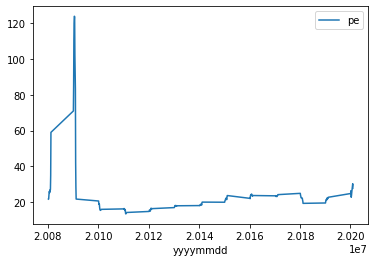

In [162]:
df_pe[df_pe.yyyymmdd>20080101].plot(x='yyyymmdd',y='pe',kind='line')

In [172]:
import urllib.request
response = urllib.request.urlopen('https://storage.googleapis.com/nflnfltest/public/nfl_lineup.json')
nfl_impact_text = response.read()
nfl_impact_dicts = json.loads(nfl_impact_text)


In [179]:
nfl_impact_dicts[1]['lineup']

[{'player_name': 'Matt Ryan',
  'position': 'QB',
  'smean': '1',
  'fpmean': '18.18561086',
  'pplus': '4.512963865',
  'pminus': '3.342936196'},
 {'player_name': 'Todd Gurley II',
  'position': 'RB',
  'smean': '0.755815196',
  'fpmean': '13.45503426',
  'pplus': '6.447954797',
  'pminus': '4.776262812'},
 {'player_name': 'Brian Hill',
  'position': 'RB',
  'smean': '0.255522011',
  'fpmean': '5.448422989',
  'pplus': '2.749742452',
  'pminus': '2.036846261'},
 {'player_name': 'Calvin Ridley',
  'position': 'WR',
  'smean': '0.673999541',
  'fpmean': '10.73448276',
  'pplus': '5.526063614',
  'pminus': '4.093380455'},
 {'player_name': 'Olamide Zaccheaus',
  'position': 'WR',
  'smean': '0.153519278',
  'fpmean': '3.75',
  'pplus': '5.075682836',
  'pminus': '3.759765064'},
 {'player_name': 'Russell Gage',
  'position': 'WR',
  'smean': '0.350117224',
  'fpmean': '2.980952381',
  'pplus': '2.861285035',
  'pminus': '2.119470397'},
 {'player_name': 'Jaeden Graham',
  'position': 'TE',


In [176]:
[nfl['team_name'] for nfl in nfl_impact_dicts]

['ARI',
 'ATL',
 'BAL',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HOU',
 'IND',
 'JAX',
 'KC',
 'LAC',
 'LAR',
 'LV',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'PHI',
 'PIT',
 'SEA',
 'SF',
 'TB',
 'TEN',
 'WAS']

32